In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import networkx as nx
import seaborn as sns
import numpy as np
from scipy.interpolate import interp1d

In [2]:
# HYPE river segment to be analyzed
riv_seg= '58242'

In [3]:
# Assuming your file is named 'data.txt'
df = pd.read_csv('../../model/model_versions/v_7/v7_1/hds_model/Pobs.txt', sep='\t',index_col=0)
st_mary= pd.read_csv('../../geospacial/misc/stmary_seg', header= None)

In [4]:
# Read the river and catchment shapefiles
gdf = gpd.read_file('../../geospacial/shapefiles/river_shapefile/smm_riv.shp')
catchment= gpd.read_file('../../geospacial/shapefiles/modified_shapefiles/Modified_SMMcat.shp')

In [5]:
# Create a dictionary from 'hru_nhm' and 'seg_nhm' columns in catchment
segment_dict = dict(zip(catchment['seg_nhm'], catchment['hru_nhm']))

In [6]:
# Convert columns to string data type
gdf['seg_nhm'] = gdf['seg_nhm'].astype(str)
gdf['ds_seg_nhm'] = gdf['ds_seg_nhm'].astype(str)

In [7]:
# Create a directed graph
riv_graph = nx.DiGraph()

# Add edges from DataFrame
for idx, row in gdf.iterrows():
    if row['ds_seg_nhm'] != '0':  # Skip if ds_seg_nhm is '0'
        riv_graph.add_edge(row['seg_nhm'], row['ds_seg_nhm'])

# Find upstream segments for given segment
upstream_segments = list(nx.ancestors(riv_graph, riv_seg))

# Add the target segment 'riv_seg' to the upstream segments
upstream_segments.append(riv_seg)

In [8]:
# Convert keys in segment_dict to integers
segment_dict = {int(k): v for k, v in segment_dict.items()}

# Convert values in upstream_segments to integers
upstream_segments = [int(seg) for seg in upstream_segments]

In [9]:
len(upstream_segments)

416

In [10]:
# Convert DataFrame column headers to integers
df.columns = df.columns.astype(int)

Use all milk seg

In [11]:
# Convert the values in the DataFrame to a list of integers
st_mary_list = st_mary[0].astype(int).tolist()

# Drop columns in `fnca` that have headers found in `st_mary_list`
df= df.drop(columns=df.columns[df.columns.isin(st_mary_list)])

In [12]:
df

,58537,58449,58641,58545,58458,58553,58414,58422,58409,58387,...,58448,58380,58342,58582,58405,58610,58389,58570,58579,58465
time,,,,,,,,,,,,,,,,,,,,,
1980-01-01,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.0000,0.0000,0.000000,0.00000,...,0.1310,0.1220,0.1100,0.1090,0.00000,0.00000,0.000005,0.00265,0.003240,0.000627
1980-01-02,0.04910,0.097000,0.096400,0.04900,0.07420,0.108000,0.1390,0.1320,0.145000,0.16100,...,0.7980,0.8940,0.8360,0.6920,0.13600,0.01210,0.008810,0.07620,0.086600,0.047600
1980-01-03,4.04000,2.560000,3.030000,3.93000,4.08000,3.260000,1.2800,2.7900,0.775000,1.48000,...,1.4600,1.3500,1.5200,2.1900,0.36100,0.15800,0.063500,0.07850,0.139000,0.268000
1980-01-04,0.00347,0.000321,0.000193,0.00919,0.00111,0.000122,0.0000,0.0000,0.000005,0.00103,...,1.9200,2.5500,2.3900,2.0500,0.47700,0.41100,0.214000,0.20000,0.142000,0.136000
1980-01-05,4.39000,4.700000,5.170000,4.38000,5.43000,5.770000,5.4100,6.0200,5.240000,5.93000,...,11.1000,11.5000,10.6000,9.5900,6.08000,4.62000,3.500000,3.40000,3.590000,4.770000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,1.06000,0.753000,0.534000,0.76600,0.28600,0.219000,0.1500,0.1220,0.113000,0.08720,...,0.3380,0.3100,0.3110,0.3020,0.28100,0.45500,0.474000,0.18700,0.196000,0.232000
2018-12-28,0.16600,0.127000,0.121000,0.17500,0.11500,0.097600,0.0799,0.0626,0.061500,0.03260,...,0.2160,0.2400,0.2150,0.2400,0.04550,0.02930,0.050200,0.07670,0.057700,0.026400
2018-12-29,0.17800,0.113000,0.131000,0.14700,0.12700,0.114000,0.0277,0.0724,0.004870,0.01300,...,0.1440,0.1390,0.1920,0.2250,0.00325,0.00574,0.005490,0.00000,0.000136,0.001760


In [13]:
# Sum all columns in the list
df['Upstream_Segments_Total'] = df.sum(axis=1) # df[upstream_segments].sum(axis=1)
df['Mean Daily Precip'] = df.apply(lambda row: row[row != 0].mean(), axis=1) # df[upstream_segments].mean(axis=1)

In [14]:
# Drop all columns except 'Upstream_Segments_Total'
df = df[['Upstream_Segments_Total', 'Mean Daily Precip']]

In [15]:
# Convert index to datetime
df.index = pd.to_datetime(df.index)


In [16]:
# Filter dates within the range April 1st to July 31st for each year between 2006 and 2014
filtered_df = df[
   # (df.index.month >= 6) & (df.index.month <= 9) &  # Months between April and July
    (df.index.year >= 1981) & (df.index.year <= 2015)  # Years between 2006 and 2014
]

In [17]:
sum_df= filtered_df[['Upstream_Segments_Total']]

In [18]:
years= sum_df.index.year

In [19]:
# Move the original index to a column
sum_df.reset_index(inplace=True)

In [20]:
# Set years as the index
sum_df.index = years

In [21]:
# Extract month and day and format as 'MM-DD'
sum_df['time'] = sum_df['time'].dt.strftime('%m-%d')

In [22]:
# Rename the index level 'time' to avoid ambiguity
sum_df.index.names = ['Date']

# Pivot the DataFrame
pivot_df = sum_df.pivot_table(index='time', columns=sum_df.index, values='Upstream_Segments_Total')

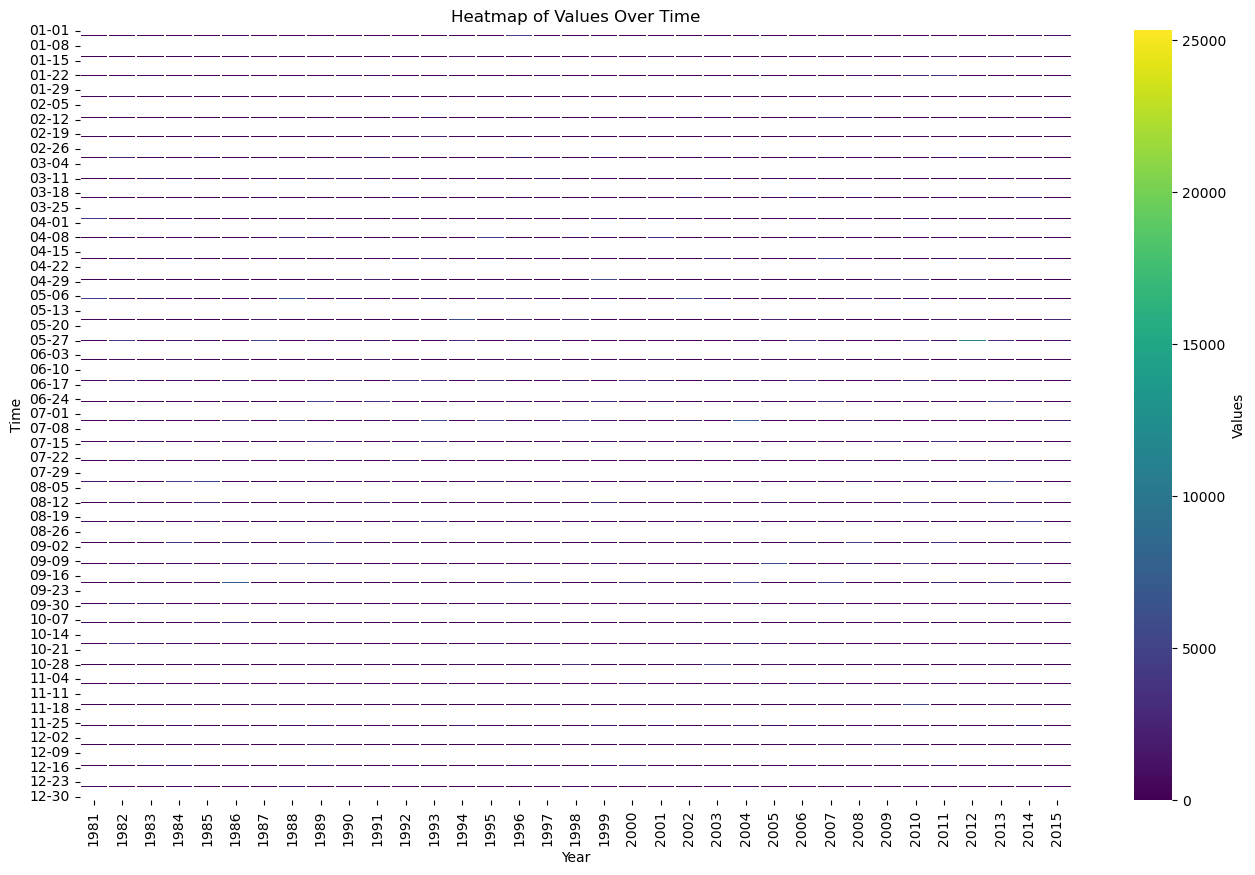

In [23]:
# Example: Heatmap to show the data trends
plt.figure(figsize=(16, 10))
sns.heatmap(
    pivot_df, 
    cmap="viridis", 
    linewidths=0.1, 
    linecolor='white', 
    cbar_kws={'label': 'Values'}
)
plt.title("Heatmap of Values Over Time")
plt.xlabel("Year")
plt.ylabel("Time")
plt.show()

In [24]:
# Find the maximum value in pivot_df
max_value = pivot_df.max().max()

# Find the column corresponding to the maximum value
column_of_max_value = pivot_df.max().idxmax()

print("Maximum value:", max_value)
print("Column containing maximum value:", column_of_max_value)

Maximum value: 25331.970000000016
Column containing maximum value: 1986


In [25]:
# Sum each column
column_sums = pivot_df.sum(axis=0)

# Convert the result to a DataFrame
column_sums_df = pd.DataFrame(column_sums, columns=['Sum'])


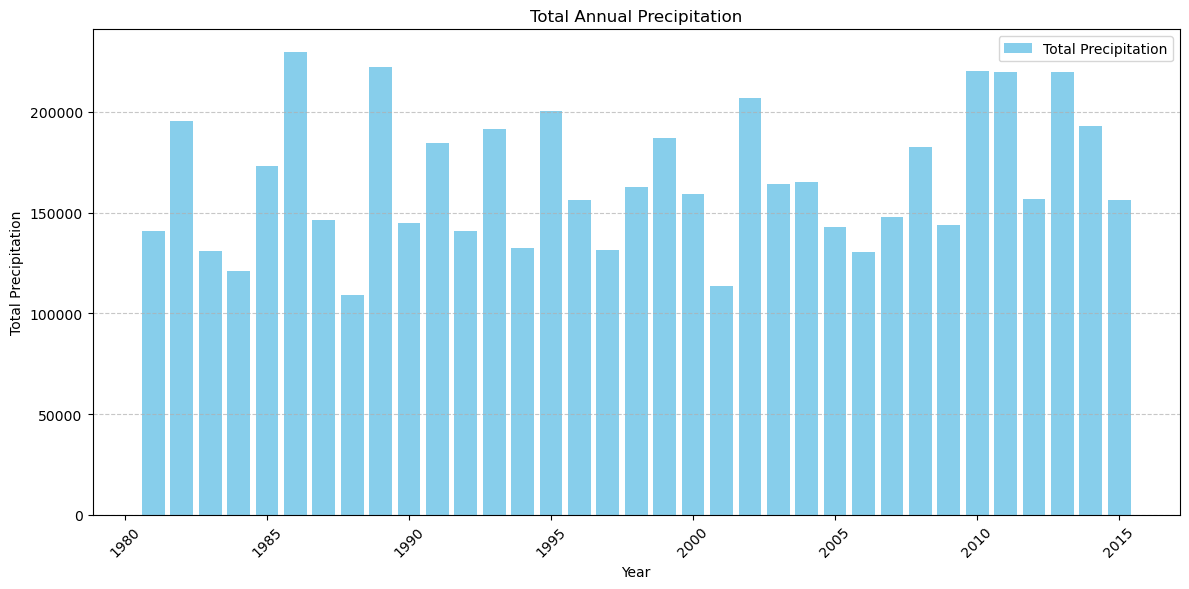

In [26]:
# Plot the data as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(column_sums_df.index, column_sums_df['Sum'], color='skyblue', label="Total Precipitation")
plt.title("Total Annual Precipitation")
plt.xlabel("Year")
plt.ylabel("Total Precipitation")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
# Sort the DataFrame by the 'Sum' column in descending order
column_sums_sorted = column_sums_df.sort_values(by='Sum', ascending=False)

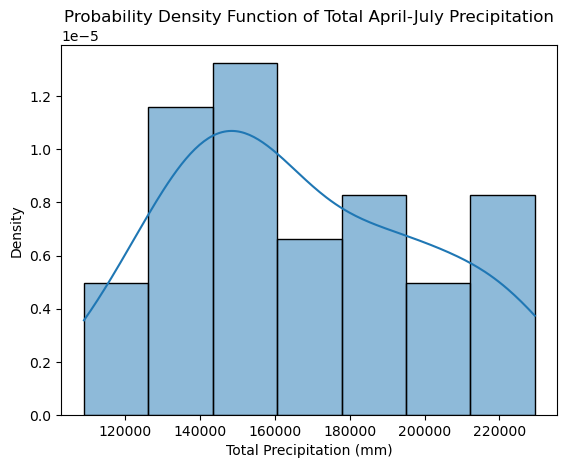

In [28]:
# Plot the PDF using seaborn
sns.histplot(column_sums_df.values.flatten(), kde=True, stat='density')

# Set the labels and title
plt.xlabel('Total Precipitation (mm)')
plt.ylabel('Density')
plt.title('Probability Density Function of Total April-July Precipitation')

# Show the plot
plt.show()

### Daily Return Period

In [29]:
daily= filtered_df[['Mean Daily Precip']]

In [30]:
# Sort precipitation values in descending order
sorted_precip = daily.sort_values(by='Mean Daily Precip', ascending=False).reset_index(drop=True)

In [31]:
total_days = len(daily)
zero_precip_days = (daily['Mean Daily Precip'] == 0).sum()
percent_zero_precip = (zero_precip_days / total_days) * 100
print(f'Percent Dry: {percent_zero_precip}%')

Percent Dry: 0.0%


In [32]:
# Drop rows with zero precipitation
daily_non_zero = daily[daily['Mean Daily Precip'] != 0]

In [33]:
# Sort precipitation values in descending order
sorted_precip = daily_non_zero.sort_values(by='Mean Daily Precip', ascending=False).reset_index(drop=True)

In [34]:
# Add ranks
sorted_precip['Rank'] = sorted_precip.index + 1

In [35]:
# Total number of observations
n = len(sorted_precip)

In [36]:
# Calculate return periods
sorted_precip['Return Period (Years)'] = (n + 1) / sorted_precip['Rank']

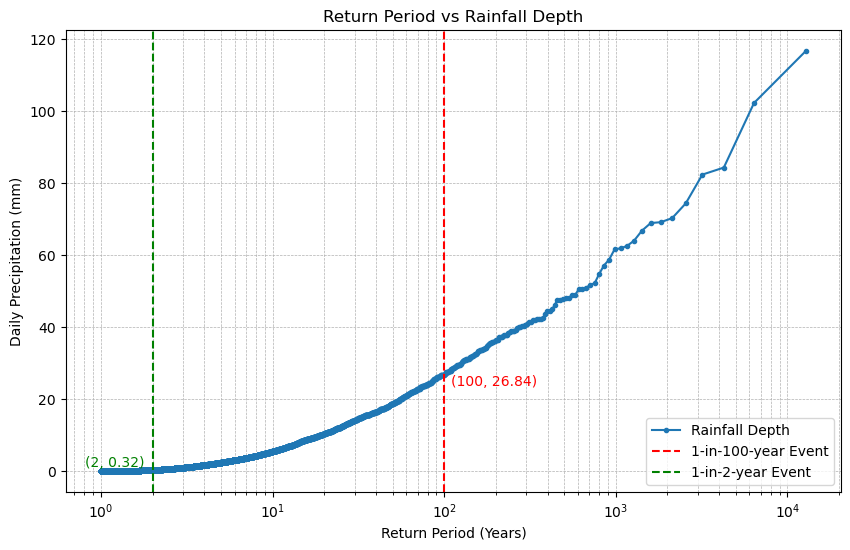

Y-value at x=100: 26.84
Y-value at x=2: 0.32


In [37]:
# Interpolation function for the curve
interp_func = interp1d(sorted_precip['Return Period (Years)'], sorted_precip['Mean Daily Precip'], kind='linear', fill_value="extrapolate")

# Find the y-values for x = 100 and x = 2
y_at_100 = interp_func(100)
y_at_2 = interp_func(2)

# Plotting the curve
plt.figure(figsize=(10, 6))
plt.plot(
    sorted_precip['Return Period (Years)'],
    sorted_precip['Mean Daily Precip'],
    marker='o', linestyle='-', markersize=3, label='Rainfall Depth'
)
plt.xscale('log')  # Use log scale for return periods
plt.title('Return Period vs Rainfall Depth')
plt.xlabel('Return Period (Years)')
plt.ylabel('Daily Precipitation (mm)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Plot vertical lines at x=100 and x=2
plt.axvline(x=100, color='r', linestyle='--', label='1-in-100-year Event')
plt.axvline(x=2, color='green', linestyle='--', label='1-in-2-year Event')

# Move the labels further away from the curve
plt.text(100 * 1.1, y_at_100, f'({100}, {y_at_100:.2f})', color='r', fontsize=10, verticalalignment='top', horizontalalignment='left')
plt.text(2 * 0.9, y_at_2, f'({2}, {y_at_2:.2f})', color='green', fontsize=10, verticalalignment='bottom', horizontalalignment='right')

# Show legend and save plot
plt.legend()
plt.savefig('../../model/precip_analysis.png')
plt.show()

# Print the y-values where the lines intersect with the curve
print(f'Y-value at x=100: {y_at_100:.2f}')
print(f'Y-value at x=2: {y_at_2:.2f}')

In [38]:
# Extract the annual maximum values (as we already did earlier)
max_precip_per_year = daily['Mean Daily Precip'].groupby(daily.index.year).max()

# Sort the annual maximum values in descending order
sorted_max_precip = max_precip_per_year.sort_values(ascending=False)

# Convert ranks into a pandas Series (ranking starts at 1 for the largest value)
ranks = pd.Series(range(1, len(sorted_max_precip) + 1), index=sorted_max_precip.index)

# Calculate the return period (T) using the formula
return_periods = (len(sorted_max_precip) + 1) / ranks

# Create a DataFrame to display the annual max and corresponding return periods
return_period_df = pd.DataFrame({
    'Annual Max Precip': sorted_max_precip,
    'Return Period (Years)': return_periods
})